In [103]:
import pandas as pd
import numpy as np

In [104]:
x_train = np.random.normal(0,1,(1000, 3))
y_train = (x_train.sum(axis=1) > 1.5).astype(int)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
mod = LogisticRegression(solver='lbfgs')
# we will try to replace this with keras

In [107]:
mod.fit(x_train, y_train).predict(x_train)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### second set keras

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import sigmoid, relu
from keras.utils import to_categorical

In [124]:
from keras.callbacks import EarlyStopping

In [109]:
to_categorical(y_train)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [112]:
x_train = np.random.normal(0,1,(1000, 3))
y_train = (x_train.sum(axis=1) > 1.5).astype(int)
x_test  = np.random.normal(0,1,(1000, 3))
y_test  = (x_test.sum(axis=1) > 1.5).astype(int)

In [127]:
#EarlyStopping(patience=15)
EarlyStopping(monitor="val_loss")

In [148]:
from keras.optimizers import Adam

In [149]:
adam = Adam(lr=0.1,
            decay=0.99)

In [154]:
model = Sequential()
model.add(Dense(3, input_shape=(3,), activation='sigmoid', name="layer1"))
#model.add(Dense(50, activation='sigmoid', name="layer3"))
model.add(Dense(2, activation='sigmoid', name="layer4"))
#model.add(Dense(2, activation='selu', name="layer5"))
model.add(Dense(2, activation='sigmoid', name="layer5"))


#model.compile(optimizer="sgd", loss="categorical_crossentropy")
model.compile(optimizer=adam, loss="categorical_crossentropy")
#you want to use a loss function metric that does more

history = model.fit(x=x_train,
                    y=to_categorical(y_train),
                    validation_data=(x_test, to_categorical(y_test)),
                    epochs=2000,
                    verbose=2,
                    callbacks=[EarlyStopping(patience=10)])
# to_categorical is like get_dummies()
# epochs are the amount of forward + backwards propagation runs (overfitting risk)

Train on 1000 samples, validate on 1000 samples
Epoch 1/2000
 - 1s - loss: 0.6018 - val_loss: 0.6023
Epoch 2/2000
 - 0s - loss: 0.6015 - val_loss: 0.6021
Epoch 3/2000
 - 0s - loss: 0.6013 - val_loss: 0.6019
Epoch 4/2000
 - 0s - loss: 0.6012 - val_loss: 0.6018
Epoch 5/2000
 - 0s - loss: 0.6010 - val_loss: 0.6017
Epoch 6/2000
 - 0s - loss: 0.6009 - val_loss: 0.6015
Epoch 7/2000
 - 0s - loss: 0.6008 - val_loss: 0.6014
Epoch 8/2000
 - 0s - loss: 0.6007 - val_loss: 0.6013
Epoch 9/2000
 - 0s - loss: 0.6006 - val_loss: 0.6013
Epoch 10/2000
 - 0s - loss: 0.6005 - val_loss: 0.6012
Epoch 11/2000
 - 0s - loss: 0.6005 - val_loss: 0.6011
Epoch 12/2000
 - 0s - loss: 0.6004 - val_loss: 0.6010
Epoch 13/2000
 - 0s - loss: 0.6003 - val_loss: 0.6009
Epoch 14/2000
 - 0s - loss: 0.6002 - val_loss: 0.6009
Epoch 15/2000
 - 0s - loss: 0.6001 - val_loss: 0.6008
Epoch 16/2000
 - 0s - loss: 0.6001 - val_loss: 0.6007
Epoch 17/2000
 - 0s - loss: 0.6000 - val_loss: 0.6006
Epoch 18/2000
 - 0s - loss: 0.5999 - val_lo

 - 0s - loss: 0.5940 - val_loss: 0.5946
Epoch 152/2000
 - 0s - loss: 0.5940 - val_loss: 0.5946
Epoch 153/2000
 - 0s - loss: 0.5939 - val_loss: 0.5946
Epoch 154/2000
 - 0s - loss: 0.5939 - val_loss: 0.5945
Epoch 155/2000
 - 0s - loss: 0.5938 - val_loss: 0.5945
Epoch 156/2000
 - 0s - loss: 0.5938 - val_loss: 0.5944
Epoch 157/2000
 - 0s - loss: 0.5938 - val_loss: 0.5944
Epoch 158/2000
 - 0s - loss: 0.5937 - val_loss: 0.5944
Epoch 159/2000
 - 0s - loss: 0.5937 - val_loss: 0.5943
Epoch 160/2000
 - 0s - loss: 0.5937 - val_loss: 0.5943
Epoch 161/2000
 - 0s - loss: 0.5936 - val_loss: 0.5943
Epoch 162/2000
 - 0s - loss: 0.5936 - val_loss: 0.5942
Epoch 163/2000
 - 0s - loss: 0.5935 - val_loss: 0.5942
Epoch 164/2000
 - 0s - loss: 0.5935 - val_loss: 0.5941
Epoch 165/2000
 - 0s - loss: 0.5935 - val_loss: 0.5941
Epoch 166/2000
 - 0s - loss: 0.5934 - val_loss: 0.5941
Epoch 167/2000
 - 0s - loss: 0.5934 - val_loss: 0.5940
Epoch 168/2000
 - 0s - loss: 0.5934 - val_loss: 0.5940
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 0.5887 - val_loss: 0.5893
Epoch 301/2000
 - 0s - loss: 0.5887 - val_loss: 0.5893
Epoch 302/2000
 - 0s - loss: 0.5886 - val_loss: 0.5893
Epoch 303/2000
 - 0s - loss: 0.5886 - val_loss: 0.5892
Epoch 304/2000
 - 0s - loss: 0.5886 - val_loss: 0.5892
Epoch 305/2000
 - 0s - loss: 0.5885 - val_loss: 0.5892
Epoch 306/2000
 - 0s - loss: 0.5885 - val_loss: 0.5891
Epoch 307/2000
 - 0s - loss: 0.5885 - val_loss: 0.5891
Epoch 308/2000
 - 0s - loss: 0.5884 - val_loss: 0.5891
Epoch 309/2000
 - 0s - loss: 0.5884 - val_loss: 0.5890
Epoch 310/2000
 - 0s - loss: 0.5884 - val_loss: 0.5890
Epoch 311/2000
 - 0s - loss: 0.5884 - val_loss: 0.5890
Epoch 312/2000
 - 0s - loss: 0.5883 - val_loss: 0.5889
Epoch 313/2000
 - 0s - loss: 0.5883 - val_loss: 0.5889
Epoch 314/2000
 - 0s - loss: 0.5883 - val_loss: 0.5889
Epoch 315/2000
 - 0s - loss: 0.5882 - val_loss: 0.5888
Epoch 316/2000
 - 0s - loss: 0.5882 - val_loss: 0.5888
Epoch 317/2000
 - 0s - loss: 0.5882 - val_loss: 0.5888
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 0.5841 - val_loss: 0.5847
Epoch 450/2000
 - 0s - loss: 0.5841 - val_loss: 0.5847
Epoch 451/2000
 - 0s - loss: 0.5840 - val_loss: 0.5846
Epoch 452/2000
 - 0s - loss: 0.5840 - val_loss: 0.5846
Epoch 453/2000
 - 0s - loss: 0.5840 - val_loss: 0.5846
Epoch 454/2000
 - 0s - loss: 0.5839 - val_loss: 0.5846
Epoch 455/2000
 - 0s - loss: 0.5839 - val_loss: 0.5845
Epoch 456/2000
 - 0s - loss: 0.5839 - val_loss: 0.5845
Epoch 457/2000
 - 0s - loss: 0.5839 - val_loss: 0.5845
Epoch 458/2000
 - 0s - loss: 0.5838 - val_loss: 0.5844
Epoch 459/2000
 - 0s - loss: 0.5838 - val_loss: 0.5844
Epoch 460/2000
 - 0s - loss: 0.5838 - val_loss: 0.5844
Epoch 461/2000
 - 0s - loss: 0.5837 - val_loss: 0.5844
Epoch 462/2000
 - 0s - loss: 0.5837 - val_loss: 0.5843
Epoch 463/2000
 - 0s - loss: 0.5837 - val_loss: 0.5843
Epoch 464/2000
 - 0s - loss: 0.5836 - val_loss: 0.5843
Epoch 465/2000
 - 0s - loss: 0.5836 - val_loss: 0.5842
Epoch 466/2000
 - 0s - loss: 0.5836 - val_loss: 0.5842
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 0.5800 - val_loss: 0.5806
Epoch 599/2000
 - 0s - loss: 0.5800 - val_loss: 0.5806
Epoch 600/2000
 - 0s - loss: 0.5799 - val_loss: 0.5805
Epoch 601/2000
 - 0s - loss: 0.5799 - val_loss: 0.5805
Epoch 602/2000
 - 0s - loss: 0.5799 - val_loss: 0.5805
Epoch 603/2000
 - 0s - loss: 0.5799 - val_loss: 0.5805
Epoch 604/2000
 - 0s - loss: 0.5798 - val_loss: 0.5804
Epoch 605/2000
 - 0s - loss: 0.5798 - val_loss: 0.5804
Epoch 606/2000
 - 0s - loss: 0.5798 - val_loss: 0.5804
Epoch 607/2000
 - 0s - loss: 0.5798 - val_loss: 0.5804
Epoch 608/2000
 - 0s - loss: 0.5797 - val_loss: 0.5803
Epoch 609/2000
 - 0s - loss: 0.5797 - val_loss: 0.5803
Epoch 610/2000
 - 0s - loss: 0.5797 - val_loss: 0.5803
Epoch 611/2000
 - 0s - loss: 0.5796 - val_loss: 0.5803
Epoch 612/2000
 - 0s - loss: 0.5796 - val_loss: 0.5802
Epoch 613/2000
 - 0s - loss: 0.5796 - val_loss: 0.5802
Epoch 614/2000
 - 0s - loss: 0.5796 - val_loss: 0.5802
Epoch 615/2000
 - 0s - loss: 0.5795 - val_loss: 0.5802
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 0.5763 - val_loss: 0.5769
Epoch 748/2000
 - 0s - loss: 0.5763 - val_loss: 0.5769
Epoch 749/2000
 - 0s - loss: 0.5763 - val_loss: 0.5769
Epoch 750/2000
 - 0s - loss: 0.5763 - val_loss: 0.5769
Epoch 751/2000
 - 0s - loss: 0.5762 - val_loss: 0.5768
Epoch 752/2000
 - 0s - loss: 0.5762 - val_loss: 0.5768
Epoch 753/2000
 - 0s - loss: 0.5762 - val_loss: 0.5768
Epoch 754/2000
 - 0s - loss: 0.5762 - val_loss: 0.5768
Epoch 755/2000
 - 0s - loss: 0.5761 - val_loss: 0.5767
Epoch 756/2000
 - 0s - loss: 0.5761 - val_loss: 0.5767
Epoch 757/2000
 - 0s - loss: 0.5761 - val_loss: 0.5767
Epoch 758/2000
 - 0s - loss: 0.5761 - val_loss: 0.5767
Epoch 759/2000
 - 0s - loss: 0.5761 - val_loss: 0.5766
Epoch 760/2000
 - 0s - loss: 0.5760 - val_loss: 0.5766
Epoch 761/2000
 - 0s - loss: 0.5760 - val_loss: 0.5766
Epoch 762/2000
 - 0s - loss: 0.5760 - val_loss: 0.5766
Epoch 763/2000
 - 0s - loss: 0.5760 - val_loss: 0.5766
Epoch 764/2000
 - 0s - loss: 0.5759 - val_loss: 0.5765
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 0.5730 - val_loss: 0.5736
Epoch 897/2000
 - 0s - loss: 0.5730 - val_loss: 0.5736
Epoch 898/2000
 - 0s - loss: 0.5730 - val_loss: 0.5736
Epoch 899/2000
 - 0s - loss: 0.5730 - val_loss: 0.5735
Epoch 900/2000
 - 0s - loss: 0.5729 - val_loss: 0.5735
Epoch 901/2000
 - 0s - loss: 0.5729 - val_loss: 0.5735
Epoch 902/2000
 - 0s - loss: 0.5729 - val_loss: 0.5735
Epoch 903/2000
 - 0s - loss: 0.5729 - val_loss: 0.5735
Epoch 904/2000
 - 0s - loss: 0.5728 - val_loss: 0.5734
Epoch 905/2000
 - 0s - loss: 0.5728 - val_loss: 0.5734
Epoch 906/2000
 - 0s - loss: 0.5728 - val_loss: 0.5734
Epoch 907/2000
 - 0s - loss: 0.5728 - val_loss: 0.5734
Epoch 908/2000
 - 0s - loss: 0.5728 - val_loss: 0.5734
Epoch 909/2000
 - 0s - loss: 0.5727 - val_loss: 0.5733
Epoch 910/2000
 - 0s - loss: 0.5727 - val_loss: 0.5733
Epoch 911/2000
 - 0s - loss: 0.5727 - val_loss: 0.5733
Epoch 912/2000
 - 0s - loss: 0.5727 - val_loss: 0.5733
Epoch 913/2000
 - 0s - loss: 0.5727 - val_loss: 0.5732
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 0.5700 - val_loss: 0.5706
Epoch 1046/2000
 - 0s - loss: 0.5700 - val_loss: 0.5706
Epoch 1047/2000
 - 0s - loss: 0.5700 - val_loss: 0.5706
Epoch 1048/2000
 - 0s - loss: 0.5700 - val_loss: 0.5705
Epoch 1049/2000
 - 0s - loss: 0.5699 - val_loss: 0.5705
Epoch 1050/2000
 - 0s - loss: 0.5699 - val_loss: 0.5705
Epoch 1051/2000
 - 0s - loss: 0.5699 - val_loss: 0.5705
Epoch 1052/2000
 - 0s - loss: 0.5699 - val_loss: 0.5705
Epoch 1053/2000
 - 0s - loss: 0.5699 - val_loss: 0.5704
Epoch 1054/2000
 - 0s - loss: 0.5698 - val_loss: 0.5704
Epoch 1055/2000
 - 0s - loss: 0.5698 - val_loss: 0.5704
Epoch 1056/2000
 - 0s - loss: 0.5698 - val_loss: 0.5704
Epoch 1057/2000
 - 0s - loss: 0.5698 - val_loss: 0.5704
Epoch 1058/2000
 - 0s - loss: 0.5698 - val_loss: 0.5703
Epoch 1059/2000
 - 0s - loss: 0.5697 - val_loss: 0.5703
Epoch 1060/2000
 - 0s - loss: 0.5697 - val_loss: 0.5703
Epoch 1061/2000
 - 0s - loss: 0.5697 - val_loss: 0.5703
Epoch 1062/2000
 - 0s - loss: 0.5697 - val_loss:

Epoch 1192/2000
 - 0s - loss: 0.5673 - val_loss: 0.5679
Epoch 1193/2000
 - 0s - loss: 0.5673 - val_loss: 0.5679
Epoch 1194/2000
 - 0s - loss: 0.5673 - val_loss: 0.5678
Epoch 1195/2000
 - 0s - loss: 0.5672 - val_loss: 0.5678
Epoch 1196/2000
 - 0s - loss: 0.5672 - val_loss: 0.5678
Epoch 1197/2000
 - 0s - loss: 0.5672 - val_loss: 0.5678
Epoch 1198/2000
 - 0s - loss: 0.5672 - val_loss: 0.5678
Epoch 1199/2000
 - 0s - loss: 0.5672 - val_loss: 0.5677
Epoch 1200/2000
 - 0s - loss: 0.5672 - val_loss: 0.5677
Epoch 1201/2000
 - 0s - loss: 0.5671 - val_loss: 0.5677
Epoch 1202/2000
 - 0s - loss: 0.5671 - val_loss: 0.5677
Epoch 1203/2000
 - 0s - loss: 0.5671 - val_loss: 0.5677
Epoch 1204/2000
 - 0s - loss: 0.5671 - val_loss: 0.5677
Epoch 1205/2000
 - 0s - loss: 0.5671 - val_loss: 0.5676
Epoch 1206/2000
 - 0s - loss: 0.5670 - val_loss: 0.5676
Epoch 1207/2000
 - 0s - loss: 0.5670 - val_loss: 0.5676
Epoch 1208/2000
 - 0s - loss: 0.5670 - val_loss: 0.5676
Epoch 1209/2000
 - 0s - loss: 0.5670 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.5648 - val_loss: 0.5654
Epoch 1340/2000
 - 0s - loss: 0.5648 - val_loss: 0.5654
Epoch 1341/2000
 - 0s - loss: 0.5648 - val_loss: 0.5653
Epoch 1342/2000
 - 0s - loss: 0.5648 - val_loss: 0.5653
Epoch 1343/2000
 - 0s - loss: 0.5647 - val_loss: 0.5653
Epoch 1344/2000
 - 0s - loss: 0.5647 - val_loss: 0.5653
Epoch 1345/2000
 - 0s - loss: 0.5647 - val_loss: 0.5653
Epoch 1346/2000
 - 0s - loss: 0.5647 - val_loss: 0.5653
Epoch 1347/2000
 - 0s - loss: 0.5647 - val_loss: 0.5652
Epoch 1348/2000
 - 0s - loss: 0.5647 - val_loss: 0.5652
Epoch 1349/2000
 - 0s - loss: 0.5646 - val_loss: 0.5652
Epoch 1350/2000
 - 0s - loss: 0.5646 - val_loss: 0.5652
Epoch 1351/2000
 - 0s - loss: 0.5646 - val_loss: 0.5652
Epoch 1352/2000
 - 0s - loss: 0.5646 - val_loss: 0.5652
Epoch 1353/2000
 - 0s - loss: 0.5646 - val_loss: 0.5651
Epoch 1354/2000
 - 0s - loss: 0.5646 - val_loss: 0.5651
Epoch 1355/2000
 - 0s - loss: 0.5645 - val_loss: 0.5651
Epoch 1356/2000
 - 0s - loss: 0.5645 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.5625 - val_loss: 0.5631
Epoch 1487/2000
 - 0s - loss: 0.5625 - val_loss: 0.5630
Epoch 1488/2000
 - 0s - loss: 0.5625 - val_loss: 0.5630
Epoch 1489/2000
 - 0s - loss: 0.5624 - val_loss: 0.5630
Epoch 1490/2000
 - 0s - loss: 0.5624 - val_loss: 0.5630
Epoch 1491/2000
 - 0s - loss: 0.5624 - val_loss: 0.5630
Epoch 1492/2000
 - 0s - loss: 0.5624 - val_loss: 0.5630
Epoch 1493/2000
 - 0s - loss: 0.5624 - val_loss: 0.5629
Epoch 1494/2000
 - 0s - loss: 0.5624 - val_loss: 0.5629
Epoch 1495/2000
 - 0s - loss: 0.5624 - val_loss: 0.5629
Epoch 1496/2000
 - 0s - loss: 0.5623 - val_loss: 0.5629
Epoch 1497/2000
 - 0s - loss: 0.5623 - val_loss: 0.5629
Epoch 1498/2000
 - 0s - loss: 0.5623 - val_loss: 0.5629
Epoch 1499/2000
 - 0s - loss: 0.5623 - val_loss: 0.5629
Epoch 1500/2000
 - 0s - loss: 0.5623 - val_loss: 0.5628
Epoch 1501/2000
 - 0s - loss: 0.5623 - val_loss: 0.5628
Epoch 1502/2000
 - 0s - loss: 0.5623 - val_loss: 0.5628
Epoch 1503/2000
 - 0s - loss: 0.5622 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.5603 - val_loss: 0.5609
Epoch 1634/2000
 - 0s - loss: 0.5603 - val_loss: 0.5609
Epoch 1635/2000
 - 0s - loss: 0.5603 - val_loss: 0.5609
Epoch 1636/2000
 - 0s - loss: 0.5603 - val_loss: 0.5609
Epoch 1637/2000
 - 0s - loss: 0.5603 - val_loss: 0.5608
Epoch 1638/2000
 - 0s - loss: 0.5603 - val_loss: 0.5608
Epoch 1639/2000
 - 0s - loss: 0.5603 - val_loss: 0.5608
Epoch 1640/2000
 - 0s - loss: 0.5602 - val_loss: 0.5608
Epoch 1641/2000
 - 0s - loss: 0.5602 - val_loss: 0.5608
Epoch 1642/2000
 - 0s - loss: 0.5602 - val_loss: 0.5608
Epoch 1643/2000
 - 0s - loss: 0.5602 - val_loss: 0.5608
Epoch 1644/2000
 - 0s - loss: 0.5602 - val_loss: 0.5607
Epoch 1645/2000
 - 0s - loss: 0.5602 - val_loss: 0.5607
Epoch 1646/2000
 - 0s - loss: 0.5602 - val_loss: 0.5607
Epoch 1647/2000
 - 0s - loss: 0.5601 - val_loss: 0.5607
Epoch 1648/2000
 - 0s - loss: 0.5601 - val_loss: 0.5607
Epoch 1649/2000
 - 0s - loss: 0.5601 - val_loss: 0.5607
Epoch 1650/2000
 - 0s - loss: 0.5601 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.5583 - val_loss: 0.5589
Epoch 1781/2000
 - 0s - loss: 0.5583 - val_loss: 0.5589
Epoch 1782/2000
 - 0s - loss: 0.5583 - val_loss: 0.5589
Epoch 1783/2000
 - 0s - loss: 0.5583 - val_loss: 0.5588
Epoch 1784/2000
 - 0s - loss: 0.5583 - val_loss: 0.5588
Epoch 1785/2000
 - 0s - loss: 0.5583 - val_loss: 0.5588
Epoch 1786/2000
 - 0s - loss: 0.5583 - val_loss: 0.5588
Epoch 1787/2000
 - 0s - loss: 0.5582 - val_loss: 0.5588
Epoch 1788/2000
 - 0s - loss: 0.5582 - val_loss: 0.5588
Epoch 1789/2000
 - 0s - loss: 0.5582 - val_loss: 0.5588
Epoch 1790/2000
 - 0s - loss: 0.5582 - val_loss: 0.5588
Epoch 1791/2000
 - 0s - loss: 0.5582 - val_loss: 0.5587
Epoch 1792/2000
 - 0s - loss: 0.5582 - val_loss: 0.5587
Epoch 1793/2000
 - 0s - loss: 0.5582 - val_loss: 0.5587
Epoch 1794/2000
 - 0s - loss: 0.5582 - val_loss: 0.5587
Epoch 1795/2000
 - 0s - loss: 0.5581 - val_loss: 0.5587
Epoch 1796/2000
 - 0s - loss: 0.5581 - val_loss: 0.5587
Epoch 1797/2000
 - 0s - loss: 0.5581 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.5565 - val_loss: 0.5570
Epoch 1928/2000
 - 0s - loss: 0.5565 - val_loss: 0.5570
Epoch 1929/2000
 - 0s - loss: 0.5564 - val_loss: 0.5570
Epoch 1930/2000
 - 0s - loss: 0.5564 - val_loss: 0.5570
Epoch 1931/2000
 - 0s - loss: 0.5564 - val_loss: 0.5570
Epoch 1932/2000
 - 0s - loss: 0.5564 - val_loss: 0.5570
Epoch 1933/2000
 - 0s - loss: 0.5564 - val_loss: 0.5569
Epoch 1934/2000
 - 0s - loss: 0.5564 - val_loss: 0.5569
Epoch 1935/2000
 - 0s - loss: 0.5564 - val_loss: 0.5569
Epoch 1936/2000
 - 0s - loss: 0.5564 - val_loss: 0.5569
Epoch 1937/2000
 - 0s - loss: 0.5563 - val_loss: 0.5569
Epoch 1938/2000
 - 0s - loss: 0.5563 - val_loss: 0.5569
Epoch 1939/2000
 - 0s - loss: 0.5563 - val_loss: 0.5569
Epoch 1940/2000
 - 0s - loss: 0.5563 - val_loss: 0.5569
Epoch 1941/2000
 - 0s - loss: 0.5563 - val_loss: 0.5568
Epoch 1942/2000
 - 0s - loss: 0.5563 - val_loss: 0.5568
Epoch 1943/2000
 - 0s - loss: 0.5563 - val_loss: 0.5568
Epoch 1944/2000
 - 0s - loss: 0.5563 - val_loss:

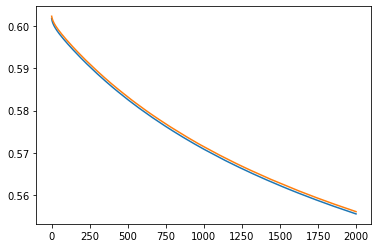

In [155]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [147]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 12        
_________________________________________________________________
layer3 (Dense)               (None, 50)                200       
_________________________________________________________________
layer4 (Dense)               (None, 20)                1020      
_________________________________________________________________
layer5 (Dense)               (None, 2)                 42        
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


In [50]:
to_categorical([1,2,3,2,1,0])

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [51]:
pd.get_dummies([1,2,3,2,1,0])

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0
5,1,0,0,0


### Lunch break and building new things

In [53]:
pd.options.display.max_rows = 25
pd.options.display.max_colwidth = 500

import matplotlib.pyplot as plt
FIGSIZE = (12.0, 5.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

%matplotlib inline

import seaborn as sns

In [54]:
df = pd.DataFrame([
    {"x1":0, "x2":0, "y":0},
    {"x1":1, "x2":0, "y":1},
    {"x1":0, "x2":1, "y":1},
    {"x1":1, "x2":1, "y":0},
])
df.index.name ="index"
df

,x1,x2,y
index,,,
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


In [57]:
X = df[["x1","x2"]]
y = df["y"]

#### Build a model
- 1 input  layer with 2 variables
- 1 hidden layer with N neurons  (tanh activation)
- 1 output layer with 1 output variable

In [74]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='relu', name="input_layer"))
model.add(Dense(2, activation='sigmoid', name="hidden_layer"))
model.add(Dense(2, activation='sigmoid', name="output_layer"))
model.compile(optimizer="sgd", loss="categorical_crossentropy")

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 2)                 6         
_________________________________________________________________
hidden_layer (Dense)         (None, 2)                 6         
_________________________________________________________________
output_layer (Dense)         (None, 2)                 6         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.fit(X, pd.get_dummies(y), epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 479us/step - loss: 0.7483
Epoch 2/10
4/4 [==============================] - 0s 370us/step - loss: 0.7480
Epoch 3/10
4/4 [==============================] - 0s 290us/step - loss: 0.7476
Epoch 4/10
4/4 [==============================] - 0s 276us/step - loss: 0.7473
Epoch 5/10
4/4 [==============================] - 0s 285us/step - loss: 0.7470
Epoch 6/10
4/4 [==============================] - 0s 281us/step - loss: 0.7466
Epoch 7/10
4/4 [==============================] - 0s 282us/step - loss: 0.7463
Epoch 8/10
4/4 [==============================] - 0s 282us/step - loss: 0.7460
Epoch 9/10
4/4 [==============================] - 0s 265us/step - loss: 0.7456
Epoch 10/10
4/4 [==============================] - 0s 262us/step - loss: 0.7453


In [99]:
test = pd.DataFrame({"x1":[0], "x2":[0]})
test

,x1,x2
0,0,0


In [102]:
model.predict(test)

array([[0.3766308 , 0.59456205]], dtype=float32)